# **Loading the dataset**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving prices-split-adjusted.csv to prices-split-adjusted.csv


# **Import libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix, precision_score

# **Data loading & processing**

In [3]:
df = pd.read_csv('prices-split-adjusted.csv')
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [5]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [6]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df['symbol'].unique().shape

(501,)

In [9]:
df['symbol'].value_counts()

symbol
KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: count, Length: 501, dtype: int64

In [10]:
label_encoding = LabelEncoder()
df['symbol'] = label_encoding.fit_transform(df['symbol'])

# **EDA**

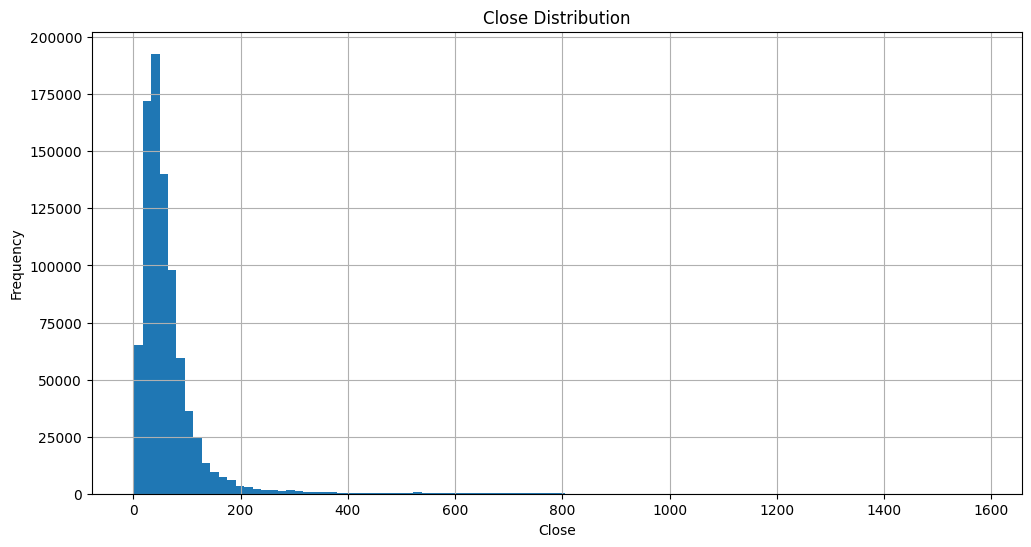

In [11]:
plt.figure(figsize=(12, 6))
df['close'].hist(bins=100)
plt.xlabel('Close')
plt.ylabel('Frequency')
plt.title('Close Distribution')
plt.show()

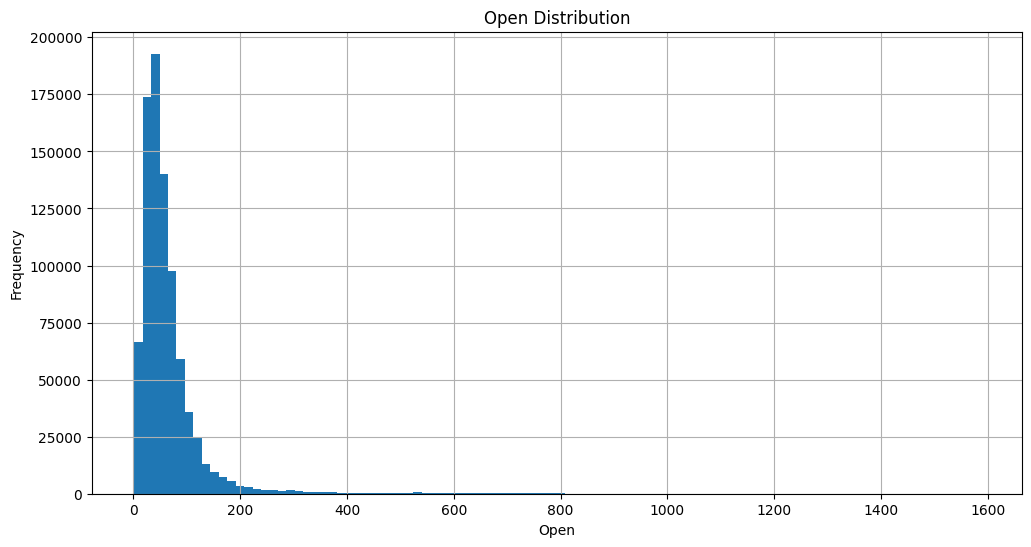

In [12]:
plt.figure(figsize=(12, 6))
df['open'].hist(bins=100)
plt.xlabel('Open')
plt.ylabel('Frequency')
plt.title('Open Distribution')
plt.show()

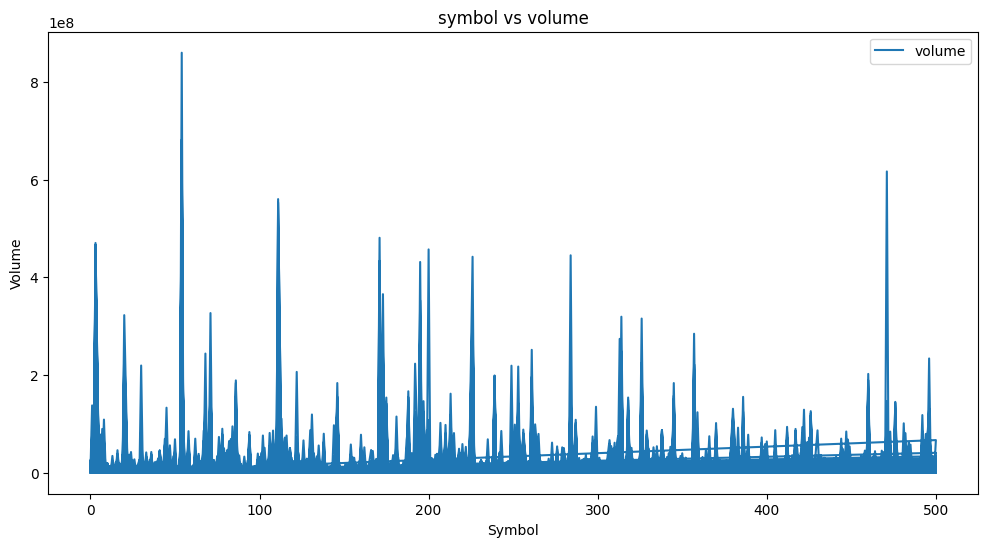

In [13]:
df.plot(x='symbol', y='volume', figsize=(12, 6), title='symbol vs volume')
plt.xlabel('Symbol')
plt.ylabel('Volume')
plt.show()

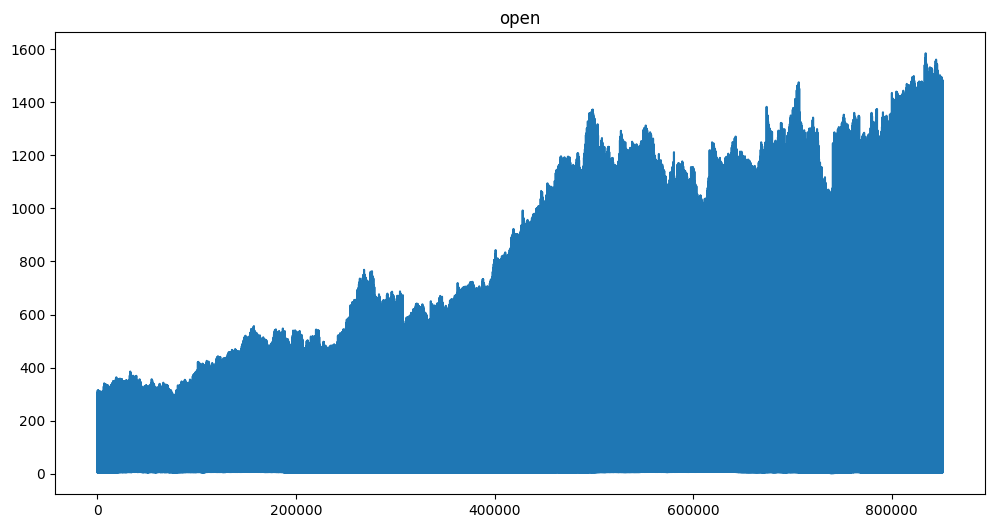

In [14]:
df['open'].plot(kind='line', figsize=(12, 6), title='open')
plt.gca().spines[['top', 'right']].set_visible(True)
plt.show()